<a href="https://colab.research.google.com/github/ZaKSa/neural-networks-8semester-/blob/marathon/%D0%97%D0%B0%D1%86%D0%B5%D0%BF%D0%B8%D0%BD%D0%B0_%225_%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BD%D0%B0_%D0%BF%D0%BE%D0%BB%D0%BD%D0%BE%D0%BC_%D0%BD%D0%B0%D0%B1%D0%BE%D1%80%D0%B5_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Зацепина Ксения 6407
1. Сделано

2. Сделано

3. **Вывод:**
Прогноз - человеку следует стоять.

4. Сделано


In [ ]:
#Для веса 0.1(в 3 день) наклон больше - он корректируется на большую величину, потому что входное значение значительно больше, данные предствалены в разных размерностях
#для этого данные предварительно нормализуют

1. Задача о светофоре. Обучение на 1 точке данных

In [ ]:
import numpy as np
weights = np.array([0.5,0.48,-0.7]) # начальные веса
learning_rate = 0.1

#набор данных, состоящий из 6 наблюдений
streetlights = np.array( [ [ 1, 0, 1 ], #единица-секции светофора, которые включены
                           [ 0, 1, 1 ],
                           [ 0, 0, 1 ],
                           [ 1, 1, 1 ],
                           [ 0, 1, 1 ],
                           [ 1, 0, 1 ] ] )
#метки класса для 6 наблюдений
walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )

input = streetlights[0] # [1,0,1]
goal_prediction = walk_vs_stop[0] #  0 - стоять, 1 - идти

for iteration in range(10):
    prediction = input.dot(weights)
    error = (prediction - goal_prediction) ** 2 

    weight_corrections = 2* (prediction - goal_prediction) * input #получаем вектор из 3х величин для коррекции 3х весов
    print("Weight corrections: "+ str(weight_corrections))

    weights = weights - (learning_rate *  weight_corrections)	

    print("Error:" + str(error) + " Prediction:" + str(prediction)) 

Weight corrections: [-0.4 -0.  -0.4]
Error:0.03999999999999998 Prediction:-0.19999999999999996
Weight corrections: [-0.24 -0.   -0.24]
Error:0.014399999999999972 Prediction:-0.11999999999999988
Weight corrections: [-0.144 -0.    -0.144]
Error:0.005183999999999977 Prediction:-0.07199999999999984
Weight corrections: [-0.0864 -0.     -0.0864]
Error:0.0018662399999999919 Prediction:-0.043199999999999905
Weight corrections: [-0.05184 -0.      -0.05184]
Error:0.000671846399999997 Prediction:-0.025919999999999943
Weight corrections: [-0.031104 -0.       -0.031104]
Error:0.00024186470400000033 Prediction:-0.01555200000000001
Weight corrections: [-0.0186624 -0.        -0.0186624]
Error:8.707129344000177e-05 Prediction:-0.009331200000000095
Weight corrections: [-0.01119744 -0.         -0.01119744]
Error:3.134566563840064e-05 Prediction:-0.005598720000000057
Weight corrections: [-0.00671846 -0.         -0.00671846]
Error:1.1284439629823931e-05 Prediction:-0.0033592319999999898
Weight corrections:

Закодируем поведение людей: 0-надо стоять, 1-надо переходить дорогу

Градиентный спуск бывает *полный*, *стохастический*, *пакетный* 

В случае обновления весов после каджой точки данных-**стохастический ГС**

Среднее значения для корректировки весов по всему набору данных - **полный ГС**

Обучающая выборка делится на пакеты и для каждого пакета свое обновление весов - **пакетный ГС**

2. Задача о светофоре.Реализуйте стохастический градиентный спуск на полном наборе данных. Выведите веса сети после обучения. Постройте график error/iteration. 

На каждой итерации ГС пробегаем по каждой точке данных, вычисляем величину коррекции весов и сразу обновляем веса

*обновлять веса после каждого обучающего примера*

прогноз вывести и суммарную/среднюю ошибку

Prediction: -0.19999999999999996
Prediction: -0.17999999999999994
Prediction: -0.42399999999999993
Prediction: 0.9168000000000001
Prediction: 0.41008
Prediction: 0.35206400000000004
Error: 0.34850881774933323 

Prediction: 0.21123840000000005
Prediction: 0.53338752
Prediction: -0.22391398399999998
Prediction: 1.2087948287999999
Prediction: 0.68129737728
Prediction: 0.24507092582400009
Error: 0.08628545688392053 

Prediction: 0.1470425554944
Prediction: 0.73035573010432
Prediction: -0.18164347070054399
Prediction: 1.1983399901790206
Prediction: 0.7952061361310925
Prediction: 0.1401058581180581
Error: 0.03803880428726757 

Prediction: 0.08406351487083485
Prediction: 0.8322898070808769
Prediction: -0.15531583783641176
Prediction: 1.1697330371585457
Prediction: 0.8625438369523901
Prediction: 0.07464133281971158
Error: 0.018765203675362243 

Prediction: 0.04478479969182697
Prediction: 0.8936410756691264
Prediction: -0.13332148672744953
Prediction: 1.1443130941556863
Prediction: 0.9051237050

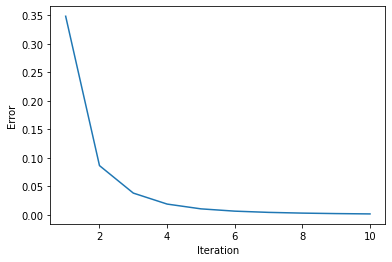

In [ ]:
import numpy as np

weights = np.array([0.5,0.48,-0.7])
learning_rate = 0.1

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ],
                          [ 0, 1, 1 ],
                          [ 1, 0, 1 ] ] )

walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )

input = streetlights[0] # [1,0,1]
goal_prediction = walk_vs_stop[0] 

import matplotlib.pyplot as plt

error = np.zeros((10,1))

for iteration in range(10):
    sum_error = 0
    for i in range(len(streetlights)):
      input = streetlights[i] #берем каждое значение
      goal_prediction = walk_vs_stop[i] 

      prediction = np.dot(input,weights)
      sum_error += (prediction - goal_prediction) ** 2 
      
      weight_corrections = 2* (prediction - goal_prediction) * input #получаем вектор из 3х величин для коррекции 3х весов
      weights = weights - (learning_rate *  weight_corrections)	

      print("Prediction:",prediction)

    sum_error/=len(streetlights)
    print("Error:",sum_error,'\n' )
    error[iteration]=sum_error 


plt.plot(range(1, streetlights+1), error)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

3. Попробуйте получить прогноз для какого-нибудь примера на ваше усмотрение. Попробуйте получить прогноз для какого-нибудь примера, где яркость секций светоыора измеряется от 0 до 1. Например, [0.9, 0.1, 0.7]. Сделайте выводы о полученных прогнозах сети. 

In [ ]:
input_intensive=[0.9, 0.1, 0.7]
prediction=np.dot(input_intensive,weights)
print(" Prediction1:" ,prediction) 

input_=[1, 0, 0]
prediction=np.dot(input_,weights)
print(" Prediction2:" ,prediction) 

 Prediction1: 0.11062096486945663
 Prediction2: 0.05046498361733431


Prediction1 с интенсивностью: 0.11062096486945663
Prediction2 с целыми значениями: 0.05046498361733431

Prediction1 больше чем Prediction2.

***********************************

Прогноз - человеку следует стоять. Если проверить, то получается зеленый(который говорит о том, что можно идти) - не горит (0,1 -слабая интенсивность)

4. Реализуйте полный градиентный спуск или стохастический градиентный спуск по мини-батчам (размер батча = 2) на полном наборе данных. Выведите веса сети после обучения. Постройте график error/iteration.

полный градиентный спуск:

На каждой итерации ГС проходим по каждому значению и считаем величину коррекции веса, но не обновляем веса. Просмотрим все, веса корректируем на среднюю величину по всем точкам данных

Prediction: -0.19999999999999996
Prediction: -0.21999999999999997
Prediction: -0.7
Prediction: 0.28
Prediction: -0.21999999999999997
Prediction: -0.19999999999999996
Error: 0.6775333333333333 

Prediction: 0.876
Prediction: 1.2640000000000002
Prediction: 0.15200000000000002
Prediction: 1.988
Prediction: 1.2640000000000002
Prediction: 0.876
Error: 0.44556533333333337 

Prediction: -0.3560000000000001
Prediction: 0.2767999999999998
Prediction: -0.5320000000000001
Prediction: 0.45279999999999987
Prediction: 0.2767999999999998
Prediction: -0.3560000000000001
Error: 0.3136600533333335 

Prediction: 0.5433600000000001
Prediction: 1.3230400000000002
Prediction: 0.11551999999999996
Prediction: 1.7508800000000004
Prediction: 1.3230400000000002
Prediction: 0.5433600000000001
Error: 0.22939258453333353 

Prediction: -0.34400000000000025
Prediction: 0.5238079999999997
Prediction: -0.40432000000000023
Prediction: 0.5841279999999998
Prediction: 0.5238079999999997
Prediction: -0.34400000000000025
Err

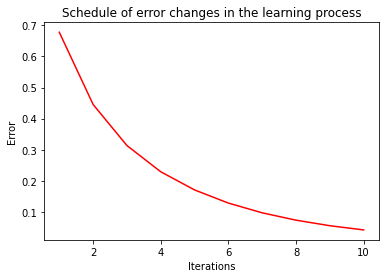

In [ ]:
import numpy as np

weights = np.array([0.5,0.48,-0.7])
learning_rate = 0.1

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ],
                          [ 0, 1, 1 ],
                          [ 1, 0, 1 ] ] )

walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )

input = streetlights[0] # [1,0,1]
goal_prediction = walk_vs_stop[0] 

import matplotlib.pyplot as plt

error = np.zeros((10))

for iteration in range(10):

    weight_corrections=0
    sum_error = 0
    
    for i in range(len(streetlights)):
      input = streetlights[i] 
      goal_prediction = walk_vs_stop[i] 

      prediction = np.dot(input,weights)
      sum_error += (prediction - goal_prediction) ** 2 
      
      weight_corrections += 2* (prediction - goal_prediction) * input #получаем вектор из 3х величин для коррекции 3х весов
      

      print("Prediction:",prediction)
    
    sum_error/=len(streetlights)

    print("Error:",sum_error,'\n' )
    error[iteration]=sum_error 
    weights = weights - (learning_rate *  weight_corrections)	


plt.plot(range(1, streetlights+1), error, 'r')
plt.title("Schedule of error changes in the learning process")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

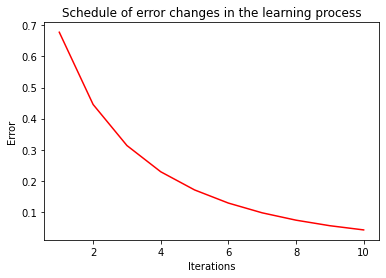

Полученный график ошибки убывает с увеличением количества итераций